In [1]:
!nvidia-smi

Sun Aug 13 17:38:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:06:00.0 Off |                    0 |
| N/A   35C    P0    43W / 300W |      3MiB / 32768MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla V100-SXM2...  Off  | 00000000:07:00.0 Off |                    0 |
| N/A   

In [2]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU device:',torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('No GPU avaialable, Using CPU')

torch.cuda.set_device(0)

/home/sur06423/miniconda3/envs/vi_trans/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU device: Tesla V100-SXM2-32GB


In [3]:
import os
import random
import matplotlib.pyplot as plt
import pathlib
import torch
from PIL import Image
from typing import Tuple, Dict, List
import numpy as np
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.io import read_image

# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
from torchvision.transforms import ToPILImage

# Check the path structure to frames
* Takes a root directory & calculates the path list
* targ_dir ="/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/test"

In [5]:
activities = ['closing_bottle', 'closing_door_inside', 'closing_door_outside', 'closing_laptop', 'drinking', 'eating', 'entering_car', 'exiting_car', 
                                'fastening_seat_belt', 'fetching_an_object', 'interacting_with_phone', 'looking_or_moving_around (e.g. searching)', 'opening_backpack', 
                                'opening_bottle', 'opening_door_inside', 'opening_door_outside', 'opening_laptop', 'placing_an_object', 'preparing_food', 'pressing_automation_button', 
                                'putting_laptop_into_backpack', 'putting_on_jacket', 'putting_on_sunglasses', 'reading_magazine', 'reading_newspaper', 'sitting_still', 
                                'taking_laptop_from_backpack', 'taking_off_jacket', 'taking_off_sunglasses', 'talking_on_phone', 'unfastening_seat_belt', 'using_multimedia_display', 
                                'working_on_laptop', 'writing']
targ_dir ="/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/test"
data_chunks = []
for activity in activities:
    activity_dir = os.path.join(targ_dir, activity)
    if os.path.exists(activity_dir):
        for annotation_id in os.listdir(activity_dir):
            frames_dir = os.path.join(activity_dir, annotation_id)
            data_chunks.append(frames_dir)

print(len(data_chunks))
for path in data_chunks:
    print(path)
    break

2222
/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/test/closing_bottle/5_vp5_run1_2018-05-22-15-10-41.kinect_color_frames_9555_9600_ann_36_chunk_0


In [6]:
import os
import csv

activities = ['closing_bottle', 'closing_door_inside', 'closing_door_outside', 'closing_laptop', 'drinking', 'eating', 'entering_car', 'exiting_car', 
                                'fastening_seat_belt', 'fetching_an_object', 'interacting_with_phone', 'looking_or_moving_around (e.g. searching)', 'opening_backpack', 
                                'opening_bottle', 'opening_door_inside', 'opening_door_outside', 'opening_laptop', 'placing_an_object', 'preparing_food', 'pressing_automation_button', 
                                'putting_laptop_into_backpack', 'putting_on_jacket', 'putting_on_sunglasses', 'reading_magazine', 'reading_newspaper', 'sitting_still', 
                                'taking_laptop_from_backpack', 'taking_off_jacket', 'taking_off_sunglasses', 'talking_on_phone', 'unfastening_seat_belt', 'using_multimedia_display', 
                                'working_on_laptop', 'writing']

targ_dir ="/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/test"
data_chunks = []
for activity in activities:
    activity_dir = os.path.join(targ_dir, activity)
    if os.path.exists(activity_dir):
        for annotation_id in os.listdir(activity_dir):
            frames_dir = os.path.join(activity_dir, annotation_id)
            data_chunks.append(frames_dir)


def process_directories(root_directory, paths_list):
    # Create the CSV file in the root directory
    csv_filename = os.path.join(root_directory, "csv_file_05.csv")
    
    with open(csv_filename, "w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)
        csv_writer.writerow(["Path", "Image Count", "Remaining Images"])
        path_count = 0
        
        for path in paths_list:
            image_count = 0
            remaining_images = 0
            
            # Count the number of .png images in the current directory
            for filename in os.listdir(path):
                if filename.lower().endswith(".png"):
                    image_count += 1
            
            # Determine the appropriate remaining images value based on the image count
            if image_count <= 16:
                remaining_images = 16 - image_count
            elif image_count <= 32:
                remaining_images = 32 - image_count
            elif image_count <= 48:
                remaining_images = 48 - image_count
            elif image_count > 49:
                remaining_images = image_count
            
            # Write data for the current path to the CSV file
            csv_writer.writerow([path, image_count, remaining_images])
            path_count += 1
            print(f"Added the path: {path_count} in the csv file")
    
    print(f"CSV file '{csv_filename}' created successfully.")


process_directories(root_directory=targ_dir, paths_list=data_chunks)

Added the path: 1 in the csv file
Added the path: 2 in the csv file
Added the path: 3 in the csv file
Added the path: 4 in the csv file
Added the path: 5 in the csv file
Added the path: 6 in the csv file
Added the path: 7 in the csv file
Added the path: 8 in the csv file
Added the path: 9 in the csv file
Added the path: 10 in the csv file
Added the path: 11 in the csv file
Added the path: 12 in the csv file
Added the path: 13 in the csv file
Added the path: 14 in the csv file
Added the path: 15 in the csv file
Added the path: 16 in the csv file
Added the path: 17 in the csv file
Added the path: 18 in the csv file
Added the path: 19 in the csv file
Added the path: 20 in the csv file
Added the path: 21 in the csv file
Added the path: 22 in the csv file
Added the path: 23 in the csv file
Added the path: 24 in the csv file
Added the path: 25 in the csv file
Added the path: 26 in the csv file
Added the path: 27 in the csv file
Added the path: 28 in the csv file
Added the path: 29 in the csv

In [7]:
# Make function to find classes in target directory
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
    """Finds the class folder names in a target directory.
    
    Assumes target directory is in standard image classification format.

    Args:
        directory (str): target directory to load classnames from.

    Returns:
        Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
    
    Example:
        find_classes("food_images/train")
        >>> (["class_1", "class_2"], {"class_1": 0, ...})
    """
    # 1. Get the class names by scanning the target directory
    classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    
    # 2. Raise an error if class names not found
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
        
    # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [10]:
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
from torchvision.transforms import ToPILImage
# Write a custom dataset class (inherits from torch.utils.data.Dataset)
from torch.utils.data import Dataset
from PIL import Image
import pathlib
from typing import Tuple

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    
    # 2. Initialize with a targ_dir and transform (optional) parameter
    def __init__(self, targ_dir: str, transform=None) -> None:
        
        # 3. Create class attributes
        # Get all image paths
        self.paths = list(pathlib.Path(targ_dir).glob("*/*/*.png")) # note: you'd have to update this if you've got .png's or .jpeg's
        # Setup transforms
        self.transform = transform
        # Create classes and class_to_idx attributes
        self.classes, self.class_to_idx = self.find_classes(targ_dir)

    # 4. Make function to load images
    def load_image(self, index: int) -> Image.Image:
        "Opens an image via a path and returns it."
        image_path = self.paths[index]
        return Image.open(image_path) 
    
    # 5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
    def __len__(self) -> int:
        "Returns the total number of samples."
        return len(self.paths)
    
    # 6. Make function to find classes in target directory
    def find_classes(self, directory: str) -> Tuple[List[str], Dict[str, int]]:
        """Finds the class folder names in a target directory.
        
        Assumes target directory is in standard image classification format.

        Args:
            directory (str): target directory to load classnames from.

        Returns:
            Tuple[List[str], Dict[str, int]]: (list_of_class_names, dict(class_name: idx...))
        
        Example:
            find_classes("food_images/train")
            >>> (["class_1", "class_2"], {"class_1": 0, ...})
        """
        # 1. Get the class names by scanning the target directory
        classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
        
        # 2. Raise an error if class names not found
        if not classes:
            raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
            
        # 3. Crearte a dictionary of index labels (computers prefer numerical rather than string labels)
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx
    
    # 7. Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
    def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
        "Returns one sample of data, data and label (X, y)."
        img = self.load_image(index)
        # Get the class name from grandparent directory
        class_name  = self.paths[index].parent.parent.name # expects path in data_folder/class_name/chunk_0/image.png
        class_idx = self.class_to_idx[class_name]

        # Transform if necessary
        if self.transform:
            return self.transform(img), class_idx # return data, label (X, y)
        else:
            return img, class_idx # return data, label (X, y)

In [12]:
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((254, 254)),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((254, 254)),
    transforms.ToTensor()
])

In [13]:
train_dir = "/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/train"
test_dir = "/home/sur06423/hiwi/vit_exp/vision_tranformer_baseline/daa_dataset/test"
train_data_custom = ImageFolderCustom(targ_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f0fb0f4a980>,
 <__main__.ImageFolderCustom at 0x7f0fb0f4ad70>)

In [14]:
len(train_data_custom), len(test_data_custom)

(259865, 87315)

In [20]:
class_names = train_data_custom.classes
class_names

['closing_bottle',
 'closing_door_inside',
 'closing_door_outside',
 'closing_laptop',
 'drinking',
 'eating',
 'entering_car',
 'exiting_car',
 'fastening_seat_belt',
 'fetching_an_object',
 'interacting_with_phone',
 'looking_or_moving_around (e.g. searching)',
 'opening_backpack',
 'opening_bottle',
 'opening_door_inside',
 'opening_door_outside',
 'opening_laptop',
 'placing_an_object',
 'preparing_food',
 'pressing_automation_button',
 'putting_laptop_into_backpack',
 'putting_on_jacket',
 'putting_on_sunglasses',
 'reading_magazine',
 'reading_newspaper',
 'sitting_still',
 'taking_laptop_from_backpack',
 'taking_off_jacket',
 'taking_off_sunglasses',
 'talking_on_phone',
 'unfastening_seat_belt',
 'using_multimedia_display',
 'working_on_laptop',
 'writing']

In [21]:
class_dict = train_data_custom.class_to_idx
class_dict

{'closing_bottle': 0,
 'closing_door_inside': 1,
 'closing_door_outside': 2,
 'closing_laptop': 3,
 'drinking': 4,
 'eating': 5,
 'entering_car': 6,
 'exiting_car': 7,
 'fastening_seat_belt': 8,
 'fetching_an_object': 9,
 'interacting_with_phone': 10,
 'looking_or_moving_around (e.g. searching)': 11,
 'opening_backpack': 12,
 'opening_bottle': 13,
 'opening_door_inside': 14,
 'opening_door_outside': 15,
 'opening_laptop': 16,
 'placing_an_object': 17,
 'preparing_food': 18,
 'pressing_automation_button': 19,
 'putting_laptop_into_backpack': 20,
 'putting_on_jacket': 21,
 'putting_on_sunglasses': 22,
 'reading_magazine': 23,
 'reading_newspaper': 24,
 'sitting_still': 25,
 'taking_laptop_from_backpack': 26,
 'taking_off_jacket': 27,
 'taking_off_sunglasses': 28,
 'talking_on_phone': 29,
 'unfastening_seat_belt': 30,
 'using_multimedia_display': 31,
 'working_on_laptop': 32,
 'writing': 33}

# Create a function to display random images

In [28]:
# Set seed
#random.seed(42)
import random
import matplotlib.pyplot as plt

# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

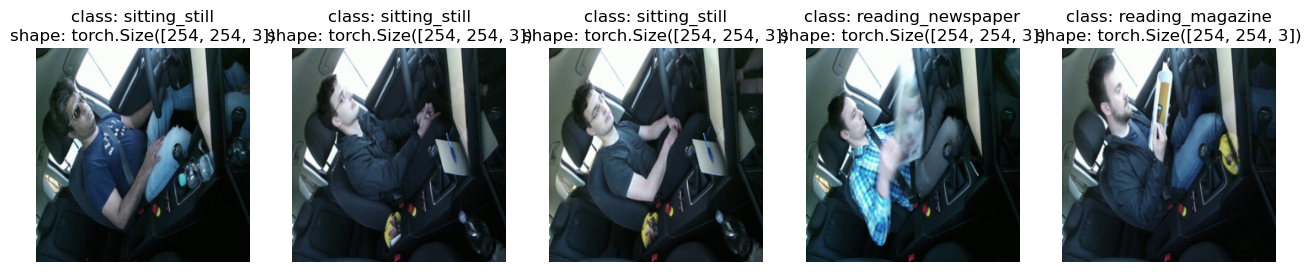

In [29]:
# Display random images from ImageFolder created Dataset
display_random_images(train_data_custom, 
                      n=5, 
                      classes=class_names,
                      seed=None)

# Turn train and test custom Dataset's into DataLoader's

In [30]:
from torch.utils.data import DataLoader
train_dataloader_custom = DataLoader(dataset=train_data_custom, # use custom created train Dataset
                                     batch_size=1, # how many samples per batch?
                                     num_workers=0, # how many subprocesses to use for data loading? (higher = more)
                                     shuffle=False) # shuffle the data?

test_dataloader_custom = DataLoader(dataset=test_data_custom, # use custom created test Dataset
                                    batch_size=1, 
                                    num_workers=0, 
                                    shuffle=False) # don't usually need to shuffle testing data

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f0f847dbd30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f0f847db1c0>)

In [31]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([1, 3, 254, 254]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])
